In [145]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [146]:
df = pd.read_csv("../datasets/weight_height.csv", encoding="euc-kr", usecols=["학교명", "학년", "성별", "키", "몸무게"])
df

,학교명,학년,성별,키,몸무게
0,서울대도초등학교,1,남,125.8,27.3
1,서울대도초등학교,1,남,124.3,25.4
2,서울대도초등학교,1,남,119.2,23.5
3,서울대도초등학교,1,남,115.0,20.0
4,서울대도초등학교,1,남,120.0,33.5
...,...,...,...,...,...
9681,세종과학고등학교,3,남,176.1,50.4
9682,세종과학고등학교,3,남,174.1,88.8
9683,세종과학고등학교,3,남,169.5,63.2
9684,세종과학고등학교,3,여,159.2,52.9


In [147]:
# df["학교명"] -> 초등학교 = 0 / 중학교 = 6 / 고등학교 = 9 + df["학년"]
df["grade"] = df["학교명"].map(lambda x: 0 if x.endswith("초등학교")
                            else 6 if x.endswith("중학교")
                            else 9) + df["학년"]
df

,학교명,학년,성별,키,몸무게,grade
0,서울대도초등학교,1,남,125.8,27.3,1
1,서울대도초등학교,1,남,124.3,25.4,1
2,서울대도초등학교,1,남,119.2,23.5,1
3,서울대도초등학교,1,남,115.0,20.0,1
4,서울대도초등학교,1,남,120.0,33.5,1
...,...,...,...,...,...,...
9681,세종과학고등학교,3,남,176.1,50.4,12
9682,세종과학고등학교,3,남,174.1,88.8,12
9683,세종과학고등학교,3,남,169.5,63.2,12
9684,세종과학고등학교,3,여,159.2,52.9,12


In [148]:
df.drop(["학교명", "학년"], axis="columns", inplace=True)
df. columns =["gender", "height", "weight", "grade"]
df

,gender,height,weight,grade
0,남,125.8,27.3,1
1,남,124.3,25.4,1
2,남,119.2,23.5,1
3,남,115.0,20.0,1
4,남,120.0,33.5,1
...,...,...,...,...
9681,남,176.1,50.4,12
9682,남,174.1,88.8,12
9683,남,169.5,63.2,12
9684,여,159.2,52.9,12


In [149]:
# 남 : 0 / 여 : 1
df["gender"] = df["gender"].map(lambda x : 0 if x == "남" else 1)
df

,gender,height,weight,grade
0,0,125.8,27.3,1
1,0,124.3,25.4,1
2,0,119.2,23.5,1
3,0,115.0,20.0,1
4,0,120.0,33.5,1
...,...,...,...,...
9681,0,176.1,50.4,12
9682,0,174.1,88.8,12
9683,0,169.5,63.2,12
9684,1,159.2,52.9,12


In [150]:
# 데이터의 공백 또는 NoN 값을 확인
print(df.isna().sum())

gender    0
height    0
weight    4
grade     0
dtype: int64


In [151]:
# 9686개중 4개의 데이터 비정상임으로 인한 삭제 결정 및 결과 확인
df = df.dropna()
print(df.isna().sum())

gender    0
height    0
weight    0
grade     0
dtype: int64


In [152]:
# 몸무게와 키를 통해서 성별을 예측하고 싶다!! ml11 or ml12
# 1. 데이터셋 준비
x = df[["weight", "height"]]
y = df[["gender"]]

In [153]:
# 데이터 이상유무 재 확인
print(x.isna().sum())
print(x.isnull().sum())
print(x.shape, y.shape)


weight    0
height    0
dtype: int64
weight    0
height    0
dtype: int64
(9682, 2) (9682, 1)


In [154]:
# 2. 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [155]:
# 3. 모델 선택
model = LogisticRegression()

In [156]:
# 4. 모델 학습
model.fit(x_train, y_train)

c:\Users\Daniel\miniconda3\envs\multi02\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [157]:
# 5. 예측 및 평가
model.score(x_test, y_test)

0.5290877796901893

In [158]:
model.predict([[125.8, 27.3],[124.3, 25.4],[119.2, 23.5],[115.0, 20.0],[120.0, 33.5], [174.1, 88.8]])

c:\Users\Daniel\miniconda3\envs\multi02\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1, 1, 1, 1, 1, 0])

In [159]:
# 평가지표를 가져가다가 평가해 보세요! ml14 참고
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score, classification_report, precision_recall_curve, roc_curve, roc_auc_score

In [160]:
predict = model.predict(x_test)

In [161]:
cm = confusion_matrix(y_test, predict)
cm

array([[957, 553],
       [815, 580]])

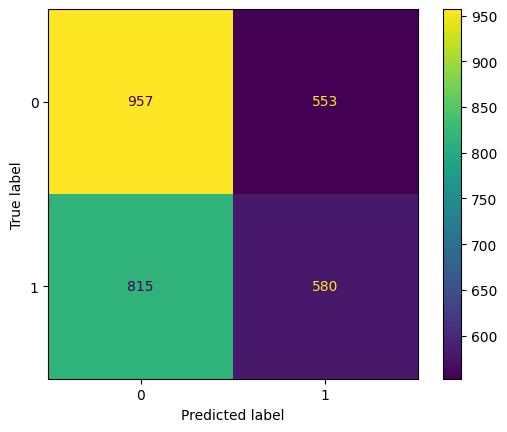

In [162]:
ConfusionMatrixDisplay(cm).plot()

In [163]:
cm.ravel()

array([957, 553, 815, 580])

In [164]:
# 남학생 기준 (남학생이 맞다 / 틀리다)
TP, FN, FP, TN = cm.ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)

In [165]:
print(precision_score(y_test, predict, average=None)[0])
print(f"남학생의 정밀도 :{precision}")

0.5400677200902935
남학생의 정밀도 :0.5400677200902935


In [166]:
print(recall_score(y_test, predict, average=None)[0])
print(f"남학생의 재현율 : {recall}")

0.633774834437086
남학생의 재현율 : 0.633774834437086


In [167]:
men_f1_score = 2 * ((precision * recall) / (precision + recall))

In [168]:
print(f1_score(y_test, predict, average=None)[0])
print(f"남학생의 F1-Score : {men_f1_score}")

0.583180987202925
남학생의 F1-Score : 0.583180987202925


In [169]:
# 여학생 기준 (1과 0이 뒤집혔으니까 거꾸로)
TN, FP, FN, TP = cm.ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)

In [170]:
print(precision_score(y_test, predict, average=None)[1])
print(f"여학생의 정밀도 :{precision}")

0.5119152691968226
여학생의 정밀도 :0.5119152691968226


In [171]:
print(recall_score(y_test, predict, average=None)[1])
print(f"여학생의 재현율 : {recall}")

0.4157706093189964
여학생의 재현율 : 0.4157706093189964


In [172]:
women_f1_score = 2 * ((precision * recall) / (precision + recall))

In [173]:
print(f1_score(y_test, predict, average=None)[1])
print(f"여학생의 F1-Score : {women_f1_score}")

0.4588607594936709
여학생의 F1-Score : 0.4588607594936709


In [174]:
# 전체 데이터 중 얼마나 정확하게 예측했는지 정확도를 확인 해본다.
accuracy = accuracy_score(y_test, predict)
print(f"score : {accuracy}")

score : 0.5290877796901893


In [175]:
# 위에서 알아본 각 항목을 데이터화 하여 확인해본다.
report = classification_report(y_test, predict, output_dict=True)
print(report)
df_report = pd.DataFrame(report)

{'0': {'precision': 0.5400677200902935, 'recall': 0.633774834437086, 'f1-score': 0.583180987202925, 'support': 1510.0}, '1': {'precision': 0.5119152691968226, 'recall': 0.4157706093189964, 'f1-score': 0.4588607594936709, 'support': 1395.0}, 'accuracy': 0.5290877796901893, 'macro avg': {'precision': 0.525991494643558, 'recall': 0.5247727218780412, 'f1-score': 0.5210208733482979, 'support': 2905.0}, 'weighted avg': {'precision': 0.5265487290416216, 'recall': 0.5290877796901893, 'f1-score': 0.5234816007470181, 'support': 2905.0}}


In [176]:
"""
if "gender" in df.columns:
    unique_labels = sorted(df["gender"].unique())  # [0, 1]
    label_map = {}  # ex) {'0': '남', '1': '여'}

    for lbl in unique_labels:
        label_map[str(lbl)] = df.loc[df["gender"] == lbl, "gender"].astype(str).unique()[0]

    # 숫자라면 사람이 읽을 수 있게 다시 한글로 변환 (선택사항)
    if set(unique_labels) == {0, 1}:
        label_map = {'0': '남학생', '1': '여학생'}

    # report DataFrame에 적용
    df_report.rename(columns=label_map, inplace=True)

print(df_report)
"""

'\nif "gender" in df.columns:\n    unique_labels = sorted(df["gender"].unique())  # [0, 1]\n    label_map = {}  # ex) {\'0\': \'남\', \'1\': \'여\'}\n\n    for lbl in unique_labels:\n        label_map[str(lbl)] = df.loc[df["gender"] == lbl, "gender"].astype(str).unique()[0]\n\n    # 숫자라면 사람이 읽을 수 있게 다시 한글로 변환 (선택사항)\n    if set(unique_labels) == {0, 1}:\n        label_map = {\'0\': \'남학생\', \'1\': \'여학생\'}\n\n    # report DataFrame에 적용\n    df_report.rename(columns=label_map, inplace=True)\n\nprint(df_report)\n'

In [177]:
df_report.rename(columns={"0": "남", "1": "여"}, inplace=True)
df_report

,남,여,accuracy,macro avg,weighted avg
precision,0.540068,0.511915,0.529088,0.525991,0.526549
recall,0.633775,0.415771,0.529088,0.524773,0.529088
f1-score,0.583181,0.458861,0.529088,0.521021,0.523482
support,1510.000000,1395.000000,0.529088,2905.000000,2905.000000


In [178]:
proba = model.predict_proba(x_test)
proba

array([[0.46933356, 0.53066644],
       [0.66698632, 0.33301368],
       [0.56519582, 0.43480418],
       ...,
       [0.46652726, 0.53347274],
       [0.57404822, 0.42595178],
       [0.61380844, 0.38619156]], shape=(2905, 2))

In [179]:
print(f"shape : {proba.shape}")
print(f"sum : {proba.sum(axis=1)}")

shape : (2905, 2)
sum : [1. 1. 1. ... 1. 1. 1.]


In [180]:
unique_classes = sorted(y_test["gender"].unique())
gender_name = lambda x: "Men" if x == 0 else "Women"

In [181]:
import matplotlib.pyplot as plt

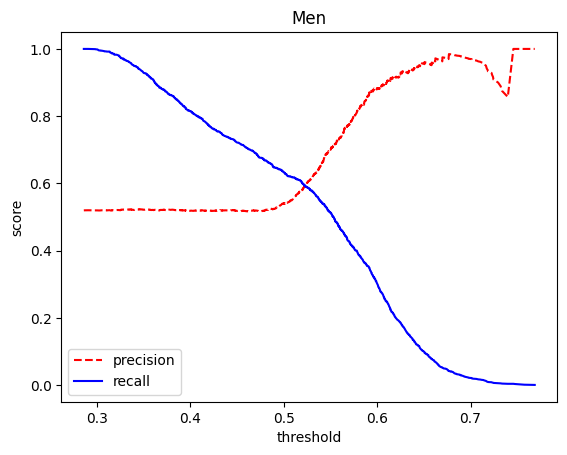

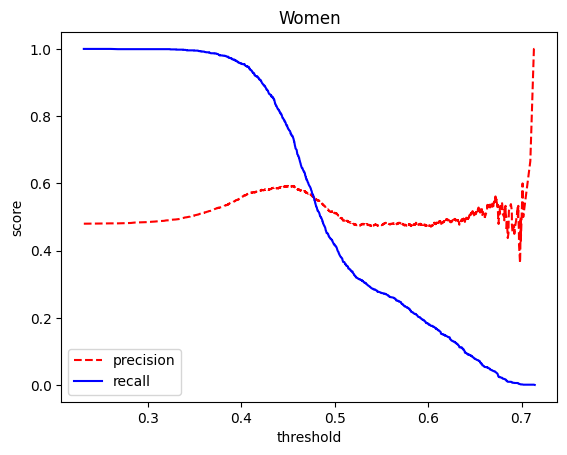

In [182]:
for i in unique_classes:
    precision, recall, thersholds = precision_recall_curve(y_test, proba[:, int(i)], pos_label=int(i))
    class_name = gender_name(i)

    plt.xlabel("threshold")
    plt.ylabel("score")
    plt.plot(thersholds, precision[: len(thersholds)], "red", linestyle="--", label="precision")
    plt.plot(thersholds, recall[: len(thersholds)], "blue", label ="recall")

    plt.legend()
    plt.title(class_name)
    plt.show()

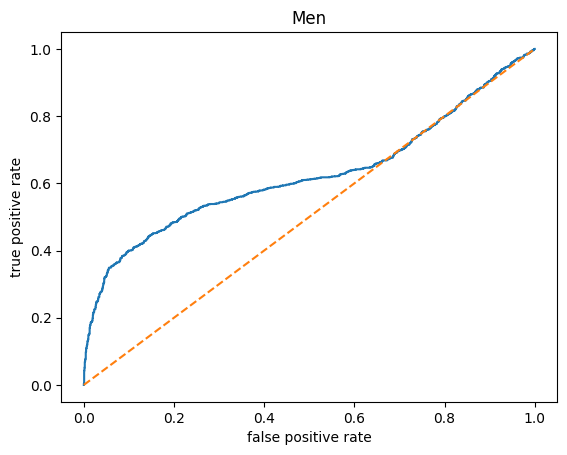

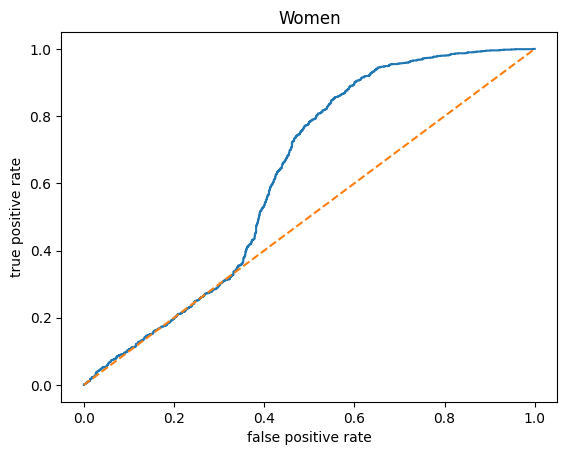

In [183]:
for i in unique_classes:
    fprs, tprs, thresholds = roc_curve(y_test, proba[:, int(i)], pos_label=int(i))
    class_name = gender_name(i)
    plt.plot(fprs, tprs)

    plt.plot([0, 1], [0, 1], "--")
    plt.title(class_name)

    plt.xlabel("false positive rate")
    plt.ylabel("true positive rate")

    plt.show()

In [184]:
# 이진 분류 이기 때문에 multi_class="ovo"를 사용하지 않는다.
roc_auc = roc_auc_score(y_test, proba[:, 1])
roc_auc

0.6247610909349854

In [185]:
# 몸무게, 키의 척도를 통일하자 (스케일링) ml15참고
#  scaling 해서 다시 모델 만들자
# 다시 평가해보자

In [186]:
# 몸무게와 키의 최대값과 최소값을 확인한다.
df["weight"].max(), df["weight"].min(), df["height"].max(),  df["height"].min()

(np.float64(130.7), np.float64(15.9), np.float64(194.2), np.float64(107.7))

In [187]:
# 수치의 차이가 크기 때문에 이를 스케일링을 통해 더욱 정확한 값을 구해보자.
from sklearn.preprocessing import MinMaxScaler

In [188]:
scaler = MinMaxScaler()

In [189]:
df_n = scaler.fit_transform(df)
df_n

array([[0.        , 0.20924855, 0.09930314, 0.        ],
       [0.        , 0.19190751, 0.08275261, 0.        ],
       [0.        , 0.13294798, 0.06620209, 0.        ],
       ...,
       [0.        , 0.71445087, 0.41202091, 1.        ],
       [1.        , 0.59537572, 0.32229965, 1.        ],
       [1.        , 0.62774566, 0.45121951, 1.        ]], shape=(9682, 4))

In [190]:
from sklearn.preprocessing import StandardScaler

In [191]:
# 스케일링 된 값에 컬럼명을 넣어준다.
df_n = pd.DataFrame(df_n, columns=df.columns)
df_n

,gender,height,weight,grade
0,0.0,0.209249,0.099303,0.0
1,0.0,0.191908,0.082753,0.0
2,0.0,0.132948,0.066202,0.0
3,0.0,0.084393,0.035714,0.0
4,0.0,0.142197,0.153310,0.0
...,...,...,...,...
9677,0.0,0.790751,0.300523,1.0
9678,0.0,0.767630,0.635017,1.0
9679,0.0,0.714451,0.412021,1.0
9680,1.0,0.595376,0.322300,1.0


In [192]:
# 평균값과 분산 값을 확인한다.
print(df_n.mean())
print(df_n.var())

gender    0.487296
height    0.541790
weight    0.298847
grade     0.586289
dtype: float64
gender    0.249864
height    0.038495
weight    0.022125
grade     0.098763
dtype: float64


In [193]:
# 1. 데이터 셋
x_1 = df_n[["weight", "height"]]
y_1 = df_n[["gender"]]

In [194]:
# 데이터의 이상유무 확인
print(x_1.isna().sum())
print(x_1.isnull().sum())
print(x_1.shape, y.shape)

weight    0
height    0
dtype: int64
weight    0
height    0
dtype: int64
(9682, 2) (9682, 1)


In [195]:
# 2. 데이터 분할
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_1, y_1, test_size=0.3, random_state=1)

In [196]:
# 3. 모델 선택
model = LogisticRegression()


In [197]:
# 4. 모델 학습
model.fit(x_train_1, y_train_1)

c:\Users\Daniel\miniconda3\envs\multi02\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [198]:
# 5. 예측 및 평가
model.score(x_test_1, y_test_1)

0.5280550774526678

In [199]:
predict_1 = model.predict(x_test_1)

In [200]:
cm_1 = confusion_matrix(y_test_1, predict_1)
cm_1

array([[958, 552],
       [819, 576]])

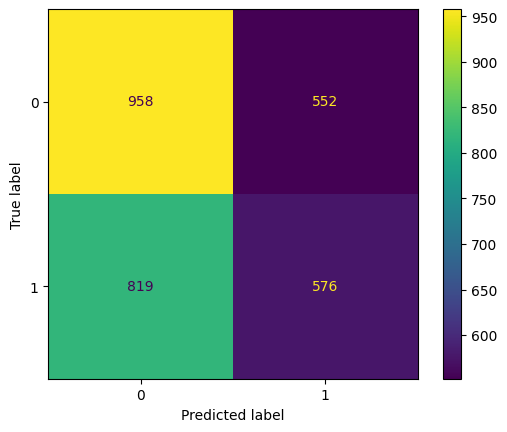

In [201]:
ConfusionMatrixDisplay(cm_1).plot()

In [202]:
cm_1.ravel()

array([958, 552, 819, 576])

In [203]:
# 남학생 기준 (남학생이 맞다 / 틀리다)
TP, FN, FP, TN = cm_1.ravel()
precision_1 = TP / (TP + FP)
recall_1 = TP / (TP + FN)

In [204]:
print(precision_score(y_test_1, predict_1, average=None)[0])
print(f"남학생의 정밀도 :{precision_1}")
print(recall_score(y_test_1, predict_1, average=None)[0])
print(f"남학생의 재현율 : {recall_1}")

0.5391108610016883
남학생의 정밀도 :0.5391108610016883
0.6344370860927152
남학생의 재현율 : 0.6344370860927152


In [205]:
men_f1_score_1 = 2 * ((precision_1 * recall_1) / (precision_1 + recall_1))

In [206]:
print(f1_score(y_test_1, predict_1, average=None)[0])
print(f"남학생의 F1-Score : {men_f1_score_1}")

0.5829023425616063
남학생의 F1-Score : 0.5829023425616063


In [207]:
# 여학생 기준 (1과 0이 뒤집혔으니까 거꾸로)
TN, FP, FN, TP = cm_1.ravel()
precision_1 = TP / (TP + FP)
recall_1 = TP / (TP + FN)

In [208]:
print(precision_score(y_test_1, predict_1, average=None)[1])
print(f"여학생의 정밀도 :{precision_1}")
print(recall_score(y_test_1, predict_1, average=None)[1])
print(f"여학생의 재현율 : {recall_1}")

0.5106382978723404
여학생의 정밀도 :0.5106382978723404
0.4129032258064516
여학생의 재현율 : 0.4129032258064516


In [209]:
women_f1_score_1 = 2 * ((precision_1 * recall_1) / (precision_1 + recall_1))

In [210]:
print(f1_score(y_test_1, predict_1, average=None)[1])
print(f"여학생의 F1-Score : {women_f1_score_1}")

0.45659928656361476
여학생의 F1-Score : 0.4565992865636147


In [211]:
accuracy_1 = accuracy_score(y_test_1, predict_1)
print(f"score : {accuracy_1}")

score : 0.5280550774526678


In [212]:
# 위에서 알아본 각 항목을 데이터화 하여 확인해본다.
report_1 = classification_report(y_test_1, predict_1, output_dict=True)
print(report_1)
df_report_1 = pd.DataFrame(report_1)
df_report_1.rename(columns={"0.0": "남", "1.0": "여"}, inplace=True)
df_report_1

{'0.0': {'precision': 0.5391108610016883, 'recall': 0.6344370860927152, 'f1-score': 0.5829023425616063, 'support': 1510.0}, '1.0': {'precision': 0.5106382978723404, 'recall': 0.4129032258064516, 'f1-score': 0.45659928656361476, 'support': 1395.0}, 'accuracy': 0.5280550774526678, 'macro avg': {'precision': 0.5248745794370143, 'recall': 0.5236701559495834, 'f1-score': 0.5197508145626105, 'support': 2905.0}, 'weighted avg': {'precision': 0.525438149963671, 'recall': 0.5280550774526678, 'f1-score': 0.5222507889928634, 'support': 2905.0}}


,남,여,accuracy,macro avg,weighted avg
precision,0.539111,0.510638,0.528055,0.524875,0.525438
recall,0.634437,0.412903,0.528055,0.523670,0.528055
f1-score,0.582902,0.456599,0.528055,0.519751,0.522251
support,1510.000000,1395.000000,0.528055,2905.000000,2905.000000


In [213]:
proba_1 = model.predict_proba(x_test_1)
proba_1

array([[0.47002166, 0.52997834],
       [0.66416748, 0.33583252],
       [0.56507895, 0.43492105],
       ...,
       [0.46770171, 0.53229829],
       [0.5736276 , 0.4263724 ],
       [0.61435589, 0.38564411]], shape=(2905, 2))

In [214]:
print(f"shape : {proba_1.shape}")
print(f"sum : {proba_1.sum(axis=1)}")

shape : (2905, 2)
sum : [1. 1. 1. ... 1. 1. 1.]


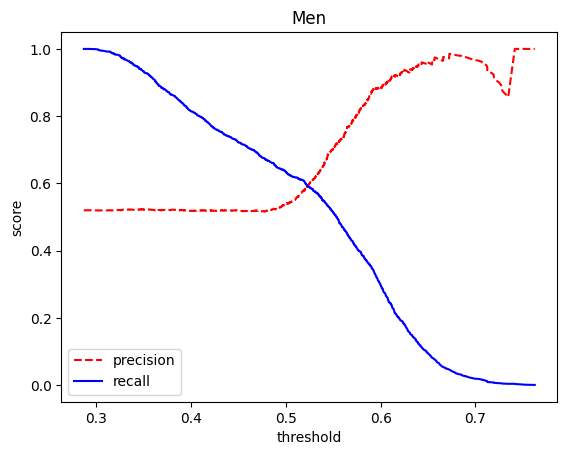

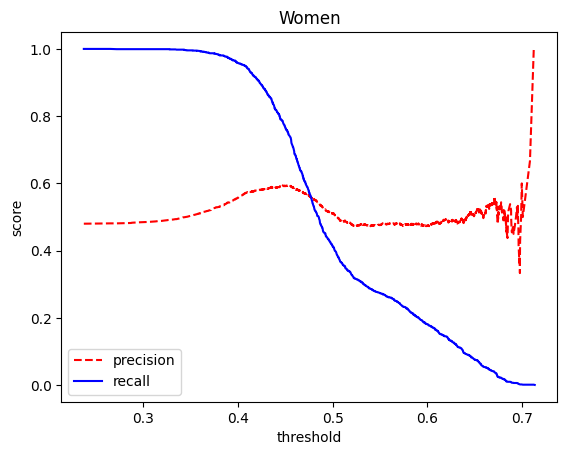

In [215]:
for i in unique_classes:
    precision_1, recall_1, thersholds_1 = precision_recall_curve(y_test_1, proba_1[:, int(i)], pos_label=int(i))
    class_name = gender_name(i)

    plt.xlabel("threshold")
    plt.ylabel("score")
    plt.plot(thersholds_1, precision_1[: len(thersholds_1)], "red", linestyle="--", label="precision")
    plt.plot(thersholds_1, recall_1[: len(thersholds_1)], "blue", label ="recall")

    plt.legend()
    plt.title(class_name)
    plt.show()

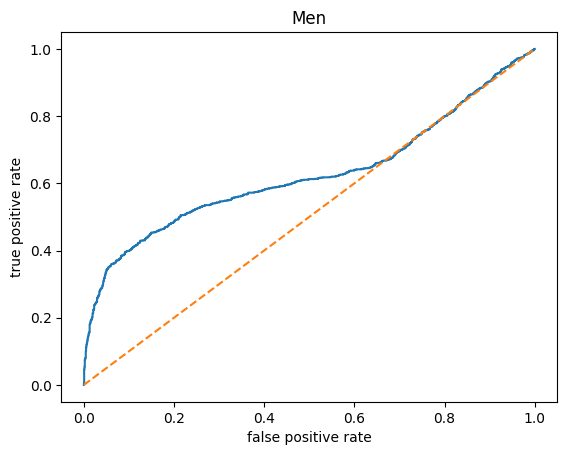

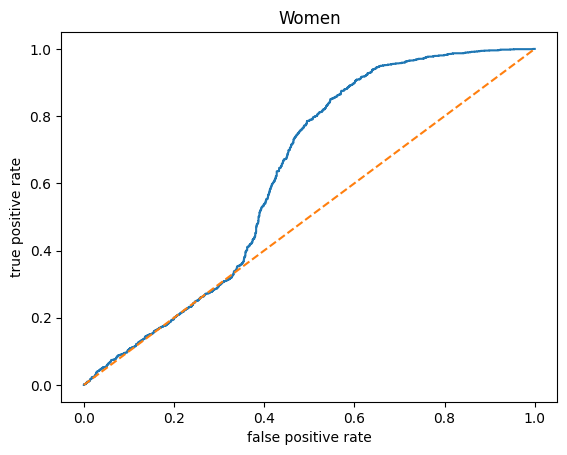

In [216]:
for i in unique_classes:
    fprs_1, tprs_1, thresholds_1 = roc_curve(y_test_1, proba_1[:, int(i)], pos_label=int(i))
    class_name = gender_name(i)
    plt.plot(fprs_1, tprs_1)

    plt.plot([0, 1], [0, 1], "--")
    plt.title(class_name)

    plt.xlabel("false positive rate")
    plt.ylabel("true positive rate")

    plt.show()

In [217]:
roc_auc_1 = roc_auc_score(y_test_1, proba_1[:, 1])
roc_auc_1

0.6259080443400032

In [218]:
print(df_report)
print(df_report_1)
print(roc_auc)
print(roc_auc_1)

                     남            여  accuracy    macro avg  weighted avg
precision     0.540068     0.511915  0.529088     0.525991      0.526549
recall        0.633775     0.415771  0.529088     0.524773      0.529088
f1-score      0.583181     0.458861  0.529088     0.521021      0.523482
support    1510.000000  1395.000000  0.529088  2905.000000   2905.000000
                     남            여  accuracy    macro avg  weighted avg
precision     0.539111     0.510638  0.528055     0.524875      0.525438
recall        0.634437     0.412903  0.528055     0.523670      0.528055
f1-score      0.582902     0.456599  0.528055     0.519751      0.522251
support    1510.000000  1395.000000  0.528055  2905.000000   2905.000000
0.6247610909349854
0.6259080443400032
